This doc reads tfidf.csv, listing rating scores and apply PCA model

plot for 1-3 Principle conponent will be provided

In [150]:
# packages 
import pandas as pd
import numpy as np
from scipy.linalg import svd

from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [127]:
# read data
tfidf = pd.read_csv('tfidf.csv')

# standardize data
tfidf_norm = (tfidf-tfidf.mean())/tfidf.std()

In [233]:
# Linear PCA
# SVD
## P >> N, we need right singular vector
## we first need to convert centered-data to numpy matrix
tfidf_center = tfidf_norm-tfidf_norm.mean()
tfidf_np = tfidf_center.to_numpy()

## svd and get Vh
## note: rows of Vh are sigular vectors
U, s, Vh_linear = svd(tfidf_np, full_matrices = False, check_finite = False)

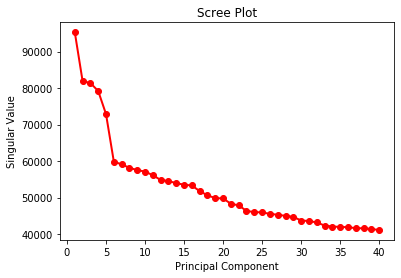

In [235]:
## scree plot
sing_vals = s[:40]**2
x_vals = np.arange(40) + 1

plt.plot(x_vals, sing_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')
plt.savefig('PCA_scree.png')

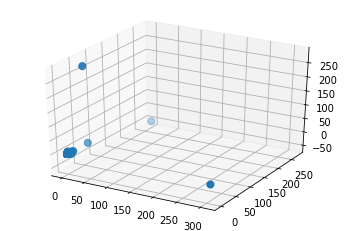

In [236]:
## project the original dataset on Vh
## only on first three PC
proj_tfidf = tfidf_np.dot(Vh[:3, :].transpose())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(proj_tfidf[:, 0], proj_tfidf[:, 1], proj_tfidf[:, 2], s = 50 )
plt.savefig('PCA_3d.png')

In [237]:
## we choose 6 principle components
proj_tfidf = tfidf_np.dot(Vh[:5, :].transpose())

In [238]:
# K-means
## fit model with different groups
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(proj_tfidf)
    inertias.append(model.inertia_)

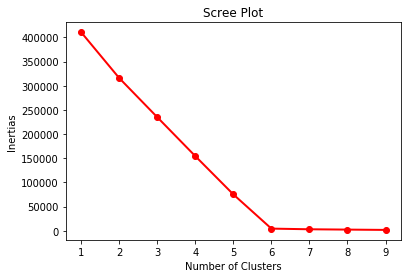

In [239]:
## scree plot for kmeans
plt.plot(ks, inertias, '-ro', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.savefig('Kmeans_scree.png')

In [240]:
model = KMeans(n_clusters=6)
model.fit(proj_tfidf)

np.count_nonzero(model.labels_ == 5)

1

In [241]:
model.labels_[110]

5

In [242]:
# we leave out group 1 to 5 and repeat the analysis
## find index and delet them from the dataset

for i in range(1, 6):
    index = np.where(model.labels_ == i)
    tfidf_np = np.delete(tfidf_np, index, 0)

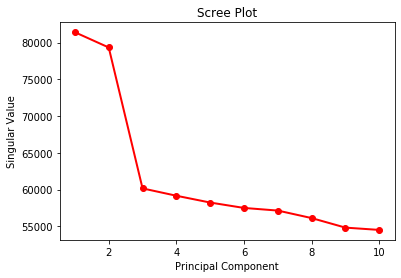

In [243]:
## repeat
U, s, Vh_linear = svd(tfidf_np, full_matrices = False, check_finite = False)

sing_vals = s[:10]**2
x_vals = np.arange(10) + 1

plt.plot(x_vals, sing_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')
plt.savefig('PCA2_scree.png')

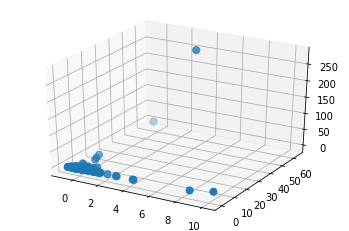

In [244]:
proj_tfidf = tfidf_np.dot(Vh[:3, :].transpose())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(proj_tfidf[:, 0], proj_tfidf[:, 1], proj_tfidf[:, 2], s = 50 )
plt.savefig('PCA2_3d.png')

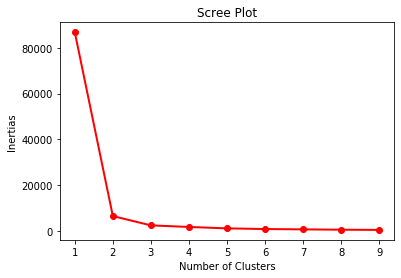

In [245]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(proj_tfidf)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-ro', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.savefig('kmeans2_scree.png')

In [246]:
model = KMeans(n_clusters=3)
model.fit(proj_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [231]:
np.count_nonzero(model.labels_ == 0)

3103

In [232]:
tfidf_np.shape

(3105, 7324)